In [6]:
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

from sklearn.svm import SVC
import numpy as np

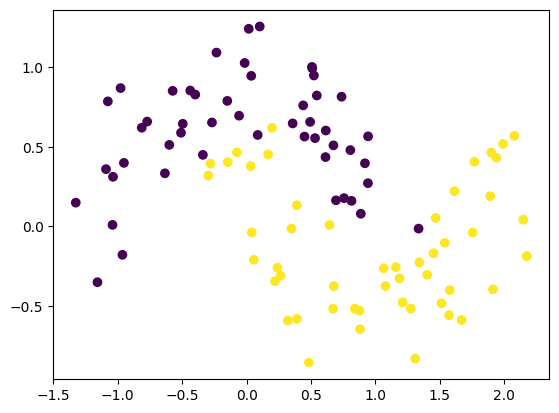

In [3]:
data = make_moons(
    n_samples=100,
    noise=.2,
    random_state=40
)
X, y = data
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
lnsc = LinearSVC()
lnsc.fit(X, y)
lnsc.score(X, y)

0.87

In [15]:
def decision_boundary_plot(X, y, clf):
    axis_x1_min, axis_x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    axis_x2_min, axis_x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    x1, x2 = np.meshgrid( np.arange(axis_x1_min,axis_x1_max, 0.01) , np.arange(axis_x2_min,axis_x2_max, 0.01))
    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z = z.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF','#BBFFBB','#F9F9CB'])

    plt.contourf(x1, x2, z, cmap=custom_cmap)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

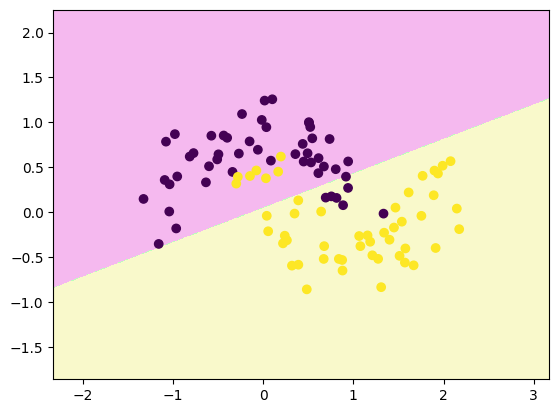

In [5]:
decision_boundary_plot(X,y, lnsc)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_clf = make_pipeline(
    PolynomialFeatures(degree=3),StandardScaler(), LinearSVC())
poly_clf.fit(X, y)
poly_clf.score(X, y)

0.96

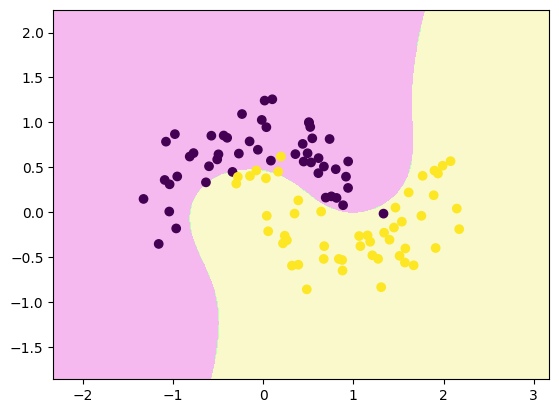

In [7]:
decision_boundary_plot(X, y, poly_clf)

In [8]:
from sklearn.svm import SVC

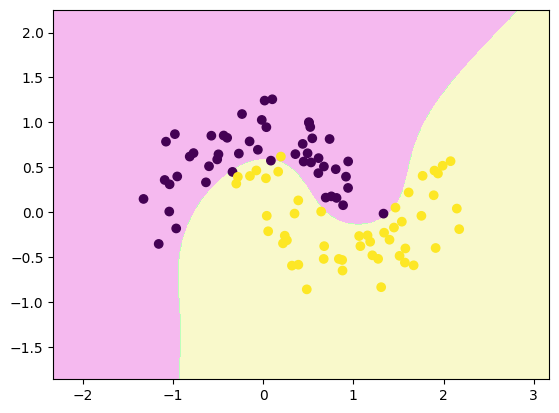

In [9]:
kernel_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    SVC(kernel='poly', degree=3,coef0=5),
)

kernel_clf.fit(X, y)
kernel_clf.score(X, y)
decision_boundary_plot(X, y, kernel_clf)

In [10]:
kernel_clf.fit(X, y)
kernel_clf.score(X, y)

0.97

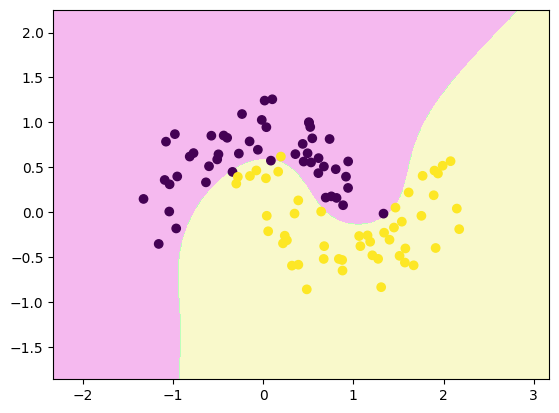

In [11]:
decision_boundary_plot(X, y, kernel_clf)

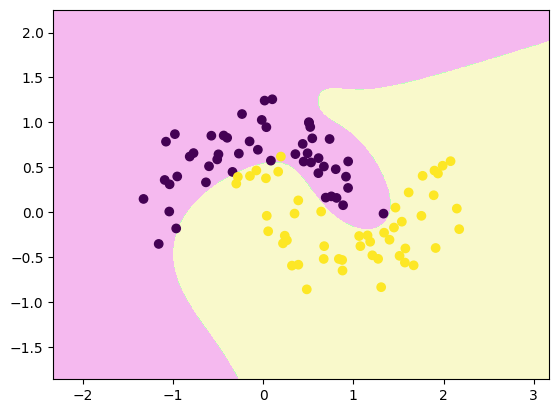

In [12]:
kernel_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    SVC(kernel='poly', degree=3,coef0=20),
)

kernel_clf.fit(X, y)
kernel_clf.score(X, y)
decision_boundary_plot(X, y, kernel_clf)

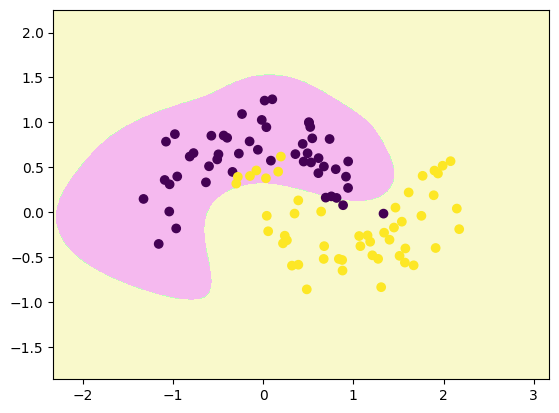

In [13]:
kernel_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    SVC(kernel='rbf', gamma=0.1),
)

kernel_clf.fit(X, y)
kernel_clf.score(X, y)
decision_boundary_plot(X, y, kernel_clf)

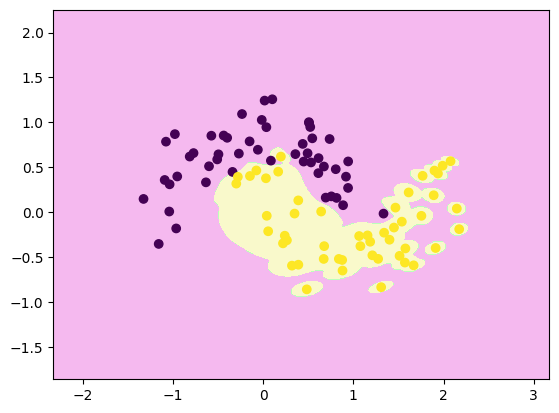

In [14]:
kernel_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    SVC(kernel='rbf', gamma=10),
)

kernel_clf.fit(X, y)
kernel_clf.score(X, y)
decision_boundary_plot(X, y, kernel_clf)

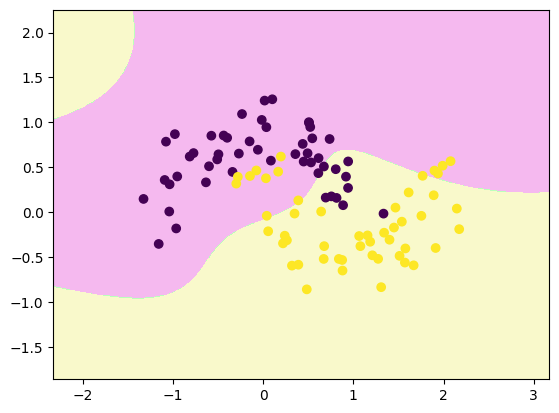

In [15]:
kernel_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    SVC(kernel='sigmoid', gamma=0.1),
)

kernel_clf.fit(X, y)
kernel_clf.score(X, y)
decision_boundary_plot(X, y, kernel_clf)

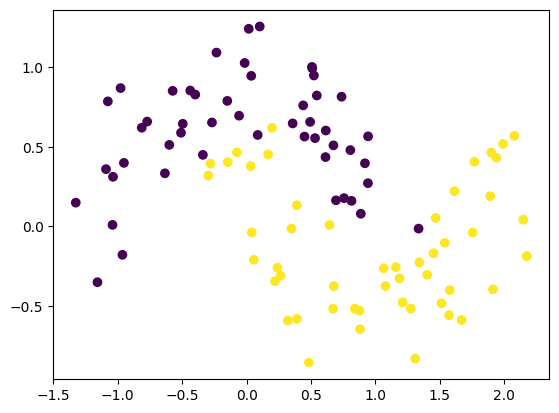

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [9]:
from sklearn.model_selection import GridSearchCV
svc = SVC()

standard = StandardScaler()
standard.fit(X)
standard.transform(X)

params = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': [1e-1, 1e-2, 1e-3, 1e-4,1,10],
    'C': [1e-1, 1e-2, 1e-3, 1e-4, 1,10]
}

grid = GridSearchCV(
    estimator=svc,
    param_grid=params,
    n_jobs=1,
)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X,y, random_state=0, train_size=0.7)

In [11]:
grid.fit(x_train, y_train)
grid.score(x_test, y_test)

0.9333333333333333

In [12]:
grid.best_estimator_

AttributeError: 'bool' object has no attribute 'all'

AttributeError: 'bool' object has no attribute 'all'

SVC(C=10, gamma=1)

In [13]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

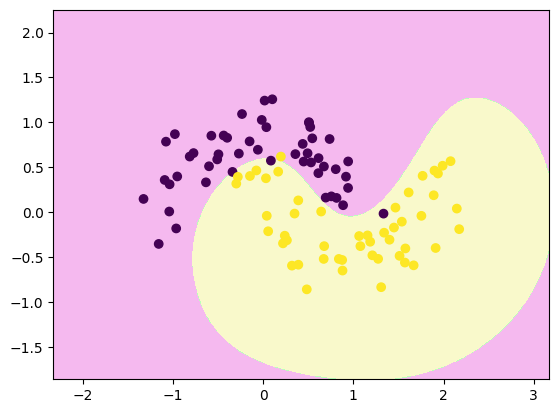

In [16]:
decision_boundary_plot(X,y,grid.best_estimator_)